In [28]:
import pandas as pd

%matplotlib inline

analisando_tumores = pd.read_csv('cancer_data.csv')
analisando_tumores.head()
at = analisando_tumores

Vamos utilizar estatística descritiva e visualisações para abordar a pergunta:
`o tamanho do tumor afeta sua malignitude?`.

Para isso precisamos comparar o tamanho do tumor com o diagnostico de 'Maligno' ou Benigno.

In [29]:
df_m = at[at['diagnosis'] == 'M'] # contem apenas tumores malignos. at['diagnosis'] == 'M' retorna uma lista de id com True para 'maligno' e False para 'Benigno'
df_m.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Criando máscaras para colunas

In [13]:
mask = at['diagnosis'] == 'M'   # Como vimos acima, essa parte retorna uma lista com True e False para maligo e benigno respectivamente...
print(mask)


0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19     False
20     False
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562     True
563     True
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool


In [16]:
# Crair máscara nos permite selecionar apenas os itens em que o diagnóstico é True('M')
df_m = at[mask]
df_m

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [30]:
df_m['area_mean'].describe()

count     212.000000
mean      978.376415
std       367.937978
min       361.600000
25%       705.300000
50%       932.000000
75%      1203.750000
max      2501.000000
Name: area_mean, dtype: float64

In [34]:
# Mascarando também os tumores benignos como fizemos com os malignos
df_b = at[at['diagnosis'] == 'B']
df_b['area_mean'].describe()

count    357.000000
mean     462.790196
std      134.287118
min      143.500000
25%      378.200000
50%      458.400000
75%      551.100000
max      992.100000
Name: area_mean, dtype: float64

In [36]:
# Podemos usar a média para comparar:
'A média de tumores malignos é de {0:.4f}, enquanto que a média para os tumores benignoes é de {0:.4f}'.format(df_m['area_mean'].mean(), df_b['area_mean'].mean())

'A média de tumores malignos é de 978.3764, enquanto que a média para os tumores benignoes é de 978.3764'

Estatísticas de resumo como é o caso da média são muito úteis ao fazer análises rápidas. Porém seria muito melhor analizar também visualmente como o matplotlib:

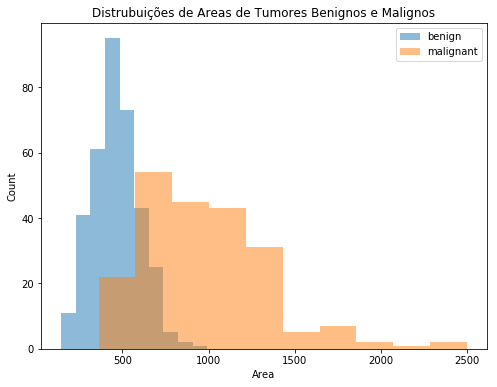

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area_mean'], alpha=0.5, label='benign')
ax.hist(df_m['area_mean'], alpha=0.5, label='malignant')
ax.set_title('Distrubuições de Areas de Tumores Benignos e Malignos')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

A visualisaçao acima sugere uma diferença entre as distribuições de areas para tumores malignos e benignos.
Ainda não temos as ferramentas para concluir que essas distribuições são diferentes ou se o tamanho realmente
afeta o diagnótico do tumor. Porém podemos observar nas estatísticas de resumo e nos histogramas acima que tumores
malignos geralmente são maiores do que os benignos.